In [1]:
#import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import *
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import os
import cv2
import glob

#import neural network library

import tensorflow as tf 
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

#warnings

import warnings
warnings.filterwarnings("ignore")


In [2]:
baseDir= r'C:\Konika\Deep neural Network\CNN_program\Cats&Dogs\train'

In [3]:
nameTest=os.listdir(baseDir)

In [4]:
len(nameTest)

25000

In [5]:
np.unique(nameTest)

array(['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', ..., 'dog.9997.jpg',
       'dog.9998.jpg', 'dog.9999.jpg'], dtype='<U13')

In [6]:
image_width=150
image_height=150

In [7]:
def imageFeatureExtract(image,size=(28,28)):
    img=cv2.resize(image,size)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray = np.expand_dims(gray, 2)#(28, 28, 1)
    return gray

In [8]:
Datasetspath= r'C:\Konika\Deep neural Network\CNN_program\Cats&Dogs\train'
datasetPath = os.path.join(Datasetspath, "*g")
fileRead = glob.glob(datasetPath)

data = []
category_or_class = []

for (i, file) in enumerate(fileRead):
    image = cv2.imread(file)
    feature = imageFeatureExtract(image)
    data.append(feature)
    classNames = file.split(os.path.sep)[-1].split(".")[0]
    category_or_class.append(classNames)


In [9]:
#Dataset scalling
data = np.array(data, dtype = np.uint8)
labels = np.array(category_or_class)

In [10]:
data.shape

(25000, 28, 28, 1)

In [11]:
np.unique(category_or_class)

array(['cat', 'dog'], dtype='<U3')

In [12]:
len(data)

25000

In [13]:
labels

array(['cat', 'cat', 'cat', ..., 'dog', 'dog', 'dog'], dtype='<U3')

In [14]:
len(labels)

25000

In [15]:
label_Encoder = LabelEncoder()
#label_Encoder = preprocessing.LabelEncoder
classNames = label_Encoder.fit_transform(labels)

In [16]:
np.unique(classNames)

array([0, 1], dtype=int64)

In [17]:
classNames.shape

(25000,)

In [18]:
classNames[2]

0

In [19]:
#help(OneHotEncoder())

In [20]:
#OneHotEncoder
labelEncoderValue=classNames.reshape(len(classNames),1)
ohe=OneHotEncoder(sparse=False)
oneHotValues=ohe.fit_transform(labelEncoderValue)


In [21]:
oneHotValues

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [22]:
#Traintest_split
(Xtrain,xtest,Ytrain,ytest)=train_test_split(data,oneHotValues,test_size=0.2,random_state=42)

In [23]:
Xtrain.shape

(20000, 28, 28, 1)

In [24]:
xtest.shape

(5000, 28, 28, 1)

In [25]:
Ytrain.shape

(20000, 2)

In [26]:
ytest.shape

(5000, 2)

####Model 

In [27]:
model = Sequential() # Empty 

# 1st layer
model.add(Conv2D(6,kernel_size = (5, 5), strides = (1, 1), activation = "sigmoid", input_shape = (28, 28, 1), padding = "same"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# 2nd Layer
model.add(Conv2D(16,kernel_size = (5, 5), strides = (1, 1), activation = "sigmoid", padding = "valid"))
model.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

# Flatten Layer
model.add(Flatten())

# Output Layer
model.add(Dense(120, activation = "sigmoid"))
model.add(Dense(84, activation = "sigmoid"))
model.add(Dense(2, activation = "softmax"))

In [28]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [30]:
model.fit(Xtrain, Ytrain,
          epochs = 10,
          validation_data = (xtest, ytest), 
          verbose = 1)

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.6919 - accuracy: 0.5205 - val_loss: 0.6732 - val_accuracy: 0.5828
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.6564 - accuracy: 0.6119 - val_loss: 0.6472 - val_accuracy: 0.6240
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6353 - accuracy: 0.6392 - val_loss: 0.6256 - val_accuracy: 0.6456
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.6243 - accuracy: 0.6515 - val_loss: 0.6210 - val_accuracy: 0.6534
Epoch 5/10
625/625 [==============================] - 6s 10ms/step - loss: 0.6153 - accuracy: 0.6590 - val_loss: 0.6087 - val_accuracy: 0.6596
Epoch 6/10
625/625 [==============================] - 7s 11ms/step - loss: 0.6056 - accuracy: 0.6704 - val_loss: 0.6018 - val_accuracy: 0.6730
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5973 - accuracy: 0.6762 - val_loss: 0.6114 - val_accuracy: 0.6652
Epo

In [31]:
model.save("Models/CatsAndDogs.h5")

In [32]:
class_data = ["cat", "dog"]
saveModelData = load_model("Models/CatsAndDogs.h5")

In [33]:
testImageData = cv2.imread(r"C:\Konika\Deep neural Network\CNN_program\pexels-pixabay-45201.jpg")
testImageDataFeature = imageFeatureExtract(testImageData)/255.0
testImageDataFeature = np.array([testImageDataFeature])

In [34]:
testImageDataFeature.shape

(1, 28, 28, 1)

In [35]:
predict = saveModelData.predict(testImageDataFeature)[0]

1/1 [==============================] - 0s 82ms/step


In [36]:
probability = saveModelData.predict(testImageDataFeature)

1/1 [==============================] - 0s 16ms/step


In [37]:
probability

array([[0.96285075, 0.03714925]], dtype=float32)

In [38]:
probabilityMaximum = predict.argmax(axis = 0)
probabilityMaximum

0

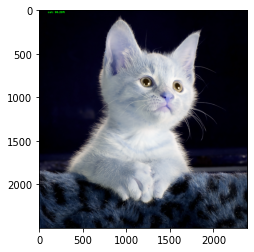

In [39]:
imageDataLabels = "{}: {:.2f}%".format(class_data[probabilityMaximum], predict[probabilityMaximum]*100)
cv2.putText(testImageData, imageDataLabels, (100, 35), cv2.FONT_HERSHEY_PLAIN, 2.0, (0, 255, 0), 3)

plt.imshow(testImageData, cmap = "gray")
plt.show()

In [40]:
#function 

class LeNet_Model(Sequential):
    
    def __init__(self, input_shape, number_class):
        super().__init__()
        
        # 1st layer
        self.add(Conv2D(6,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", input_shape = input_shape, padding = "same"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

        # 2nd Layer
        self.add(Conv2D(16,kernel_size = (5, 5), strides = (1, 1), activation = "tanh", padding = "valid"))
        self.add(AveragePooling2D(pool_size = (2, 2), strides = (2, 2), padding = "valid"))

        # Flatten Layer
        self.add(Flatten())

        # Output Layer
        self.add(Dense(120, activation = "tanh"))
        self.add(Dense(84, activation = "tanh"))
        self.add(Dense(number_class, activation = "softmax"))
        
        self.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["accuracy"])
        

In [41]:
input_shapes = Xtrain[0].shape
input_shapes

(28, 28, 1)

In [42]:
number_class=len(np.unique(labels))
number_class

2

In [43]:
myModel = LeNet_Model(input_shapes, number_class)

In [44]:
myModel.summary()

Model: "le_net__model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)             

In [45]:
import datetime
logsData = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
callbacks = tf.keras.callbacks.TensorBoard(log_dir = logsData, histogram_freq = 1)

In [46]:
history = myModel.fit(Xtrain, Ytrain,
          epochs = 10,
          validation_data = (xtest, ytest),
          callbacks=[callbacks],
          verbose = 1)

Epoch 1/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5666 - accuracy: 0.7040 - val_loss: 0.5810 - val_accuracy: 0.6930
Epoch 2/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5586 - accuracy: 0.7099 - val_loss: 0.5884 - val_accuracy: 0.6912
Epoch 3/10
625/625 [==============================] - 5s 9ms/step - loss: 0.5539 - accuracy: 0.7155 - val_loss: 0.5928 - val_accuracy: 0.6838
Epoch 4/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5488 - accuracy: 0.7189 - val_loss: 0.5827 - val_accuracy: 0.6870
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5418 - accuracy: 0.7215 - val_loss: 0.5803 - val_accuracy: 0.6950
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 0.5365 - accuracy: 0.7277 - val_loss: 0.5709 - val_accuracy: 0.6996
Epoch 7/10
625/625 [==============================] - 6s 10ms/step - loss: 0.5328 - accuracy: 0.7271 - val_loss: 0.5703 - val_accuracy: 0.6992
Epoch

In [47]:
#load_ext tensorboard

In [48]:
#tensorboard --logdir logs/fit